In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mnist=keras.datasets.fashion_mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
np.max(x_train)

255

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','nkle_boot']

# Data exploration

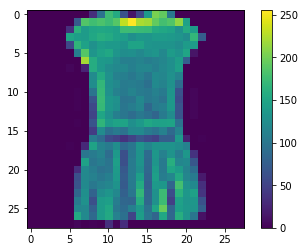

In [17]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [18]:
x_train=x_train/255.0

In [19]:
x_test=x_test/255.0

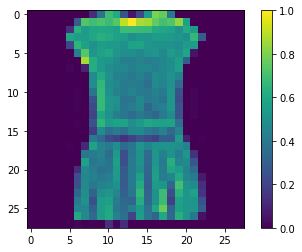

In [20]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

# Building a Model

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [24]:
model=keras.Sequential()

In [25]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model optimizer(compilation)

In [27]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4971 - accuracy: 0.8256
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3731 - accuracy: 0.8637
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3348 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3114 - accuracy: 0.8872
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2952 - accuracy: 0.8920


In [29]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [30]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred=model.predict_classes(x_test)

In [37]:

accuracy_score(y_test,y_pred)

0.8754

In [38]:
pred=model.predict(x_test)

In [39]:
pred

array([[8.6080199e-06, 8.4955589e-09, 1.7069688e-06, ..., 2.5900967e-02,
        1.9221705e-05, 9.6901220e-01],
       [3.3151366e-05, 1.5921358e-09, 9.9838841e-01, ..., 1.1225274e-14,
        1.5002360e-09, 5.2045516e-14],
       [4.1611705e-07, 9.9999964e-01, 1.0923840e-09, ..., 1.0099292e-14,
        9.8912503e-11, 1.4262986e-12],
       ...,
       [7.9449284e-04, 3.2260652e-07, 2.0664638e-04, ..., 2.2550923e-09,
        9.9807286e-01, 2.3649049e-08],
       [7.2263242e-07, 9.9997187e-01, 4.2343100e-08, ..., 3.1237015e-09,
        3.6869032e-08, 2.3906175e-08],
       [4.0033588e-04, 6.0705179e-06, 1.3033370e-04, ..., 3.8702369e-02,
        5.0121867e-03, 4.6712457e-04]], dtype=float32)

In [40]:
pred[0]

array([8.6080199e-06, 8.4955589e-09, 1.7069688e-06, 3.2882575e-08,
       4.4625614e-07, 5.0539994e-03, 2.7947908e-06, 2.5900967e-02,
       1.9221705e-05, 9.6901220e-01], dtype=float32)

In [41]:
np.argmax(pred[0])

9